# Price Finder Image Classification Model

In [1]:
import os

# walk through images directory and list number of files
for dirparth, dirnames, filenames in os.walk("images"):
  print("There are", len(dirnames), "directories and", len(filenames), "images in", dirparth)

There are 2 directories and 0 images in images
There are 4 directories and 0 images in images\test
There are 0 directories and 284 images in images\test\Alto 2015
There are 0 directories and 104 images in images\test\Hero Dash 2016
There are 0 directories and 191 images in images\test\Toyota Aqua 2014
There are 0 directories and 165 images in images\test\Wagon R Stingray 2018
There are 4 directories and 0 images in images\train
There are 0 directories and 1133 images in images\train\Alto 2015
There are 0 directories and 415 images in images\train\Hero Dash 2016
There are 0 directories and 764 images in images\train\Toyota Aqua 2014
There are 0 directories and 659 images in images\train\Wagon R Stingray 2018


In [2]:
# get the class names 

import pathlib
import numpy as np

data_dir = pathlib.Path("images/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # create a list of class_names from the subdirectories
print(class_names) 

['Alto 2015' 'Hero Dash 2016' 'Toyota Aqua 2014' 'Wagon R Stingray 2018']


In [3]:
# visualize 

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # setup the target directory
  target_folder = target_dir + target_class

  # get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print("Image shape: ", img.shape)

  return img

['01397.jpg']
Image shape:  (360, 640, 3)


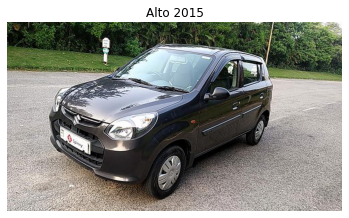

In [5]:
# view a random image from train

img = view_random_image(target_dir="images/train/", target_class="Alto 2015")

In [6]:
img

array([[[  0,  10,   0],
        [  0,  10,   0],
        [ 44,  68,  44],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 62,  86,  62],
        [ 67,  91,  67],
        [ 58,  82,  56],
        ...,
        [248, 248, 248],
        [244, 244, 244],
        [253, 253, 253]],

       [[ 74,  99,  70],
        [ 75, 100,  71],
        [ 39,  64,  34],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [251, 251, 251]],

       ...,

       [[218, 215, 210],
        [239, 236, 231],
        [176, 173, 168],
        ...,
        [144, 134, 132],
        [194, 184, 182],
        [190, 180, 178]],

       [[174, 171, 166],
        [147, 144, 139],
        [198, 195, 190],
        ...,
        [181, 171, 169],
        [199, 189, 187],
        [178, 168, 166]],

       [[179, 176, 171],
        [110, 107, 102],
        [151, 148, 143],
        ...,
        [205, 195, 193],
        [160, 150, 148],
        [200, 190, 188]]

In [7]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(360, 640, 3), dtype=uint8, numpy=
array([[[  0,  10,   0],
        [  0,  10,   0],
        [ 44,  68,  44],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 62,  86,  62],
        [ 67,  91,  67],
        [ 58,  82,  56],
        ...,
        [248, 248, 248],
        [244, 244, 244],
        [253, 253, 253]],

       [[ 74,  99,  70],
        [ 75, 100,  71],
        [ 39,  64,  34],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [251, 251, 251]],

       ...,

       [[218, 215, 210],
        [239, 236, 231],
        [176, 173, 168],
        ...,
        [144, 134, 132],
        [194, 184, 182],
        [190, 180, 178]],

       [[174, 171, 166],
        [147, 144, 139],
        [198, 195, 190],
        ...,
        [181, 171, 169],
        [199, 189, 187],
        [178, 168, 166]],

       [[179, 176, 171],
        [110, 107, 102],
        [151, 148, 143],
        ...,
        [205, 195, 19

In [8]:
# get all the pixel values between 0 and 1
img/225.

array([[[0.        , 0.04444444, 0.        ],
        [0.        , 0.04444444, 0.        ],
        [0.19555556, 0.30222222, 0.19555556],
        ...,
        [1.13333333, 1.13333333, 1.13333333],
        [1.13333333, 1.13333333, 1.13333333],
        [1.13333333, 1.13333333, 1.13333333]],

       [[0.27555556, 0.38222222, 0.27555556],
        [0.29777778, 0.40444444, 0.29777778],
        [0.25777778, 0.36444444, 0.24888889],
        ...,
        [1.10222222, 1.10222222, 1.10222222],
        [1.08444444, 1.08444444, 1.08444444],
        [1.12444444, 1.12444444, 1.12444444]],

       [[0.32888889, 0.44      , 0.31111111],
        [0.33333333, 0.44444444, 0.31555556],
        [0.17333333, 0.28444444, 0.15111111],
        ...,
        [1.13333333, 1.13333333, 1.13333333],
        [1.13333333, 1.13333333, 1.13333333],
        [1.11555556, 1.11555556, 1.11555556]],

       ...,

       [[0.96888889, 0.95555556, 0.93333333],
        [1.06222222, 1.04888889, 1.02666667],
        [0.78222222, 0

In [9]:
# Creating training set and test directory paths

train_dir = "images/train"
test_dir = "images/test"

In [11]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                            image_size = IMG_SIZE,
                                                                            label_mode = "categorical",
                                                                            batch_size = BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                image_size = IMG_SIZE,
                                                                label_mode = "categorical",
                                                                batch_size = BATCH_SIZE)

Found 2971 files belonging to 4 classes.
Found 744 files belonging to 4 classes.


In [12]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 4)), types: (tf.float32, tf.float32)>

In [13]:
# Check outt the class names

train_data.class_names

['Alto 2015', 'Hero Dash 2016', 'Toyota Aqua 2014', 'Wagon R Stingray 2018']

## Building a transfer learning feature extraction model using the Keras Functional API

In [ ]:
# 1. Create the base model with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top = False)

# 2. Freeze the base model (the underlying pre-trained patterns aren't updated during training)
base_model.trainable = False

# 3. Create inputs into our model
inputs = tf.keras.layers.Input(shape = (224, 224, 3), name = "input_layer")

# 4. If using a model like ResNet50V2 you will need to normalize inputs (you don't have to for EfficientNet(s))
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. Pass the inputs to the base_model
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. Avergae pool the outputs of the base model (aggregate all the most important information, reduce the number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation = "softmax", name = "output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_0.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# 10. Fit the model and save its history
history_10_percent = model_0.fit(train_data_10_percent,
                                 epochs = 5,
                                 steps_per_epoch = len(train_data_10_percent),
                                 validation_data = test_data,
                                 validation_steps = int( 0.25 * len(test_data)),
                                 callbacks = [create_tensorboard_callback(dir_name = "transfer_learning",
                                                                          experiment_name = "10_percent_feature_extraction")])